<a href="https://colab.research.google.com/github/SergeiNevolin/jupyter_notebooks/blob/main/%D0%9D%D0%B5%D0%B2%D0%BE%D0%BB%D0%B8%D0%BD_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B9_%22%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2_TLC_Trip_Record_Data%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TLC Trip Record Data
Полное описание данных доступно [здесь](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page). Оригинальное описание полей [тут](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

Записи включают поля, в которых указываются даты / время посадки и высадки, места посадки и высадки, расстояния поездки, подробные тарифы, типы тарифов, типы оплаты и количество пассажиров, указанное водителем. Данные, использованные в прилагаемых наборах данных, были собраны и предоставлены в Комиссию по такси и лимузинам Нью-Йорка (TLC) поставщиками технологий, уполномоченными в соответствии с программами повышения качества обслуживания пассажиров такси и ливреи (TPEP / LPEP). Данные поездки не были созданы TLC, и TLC не делает никаких заявлений относительно точности этих данных.

Перед вами набор данных о поездках желтых такси в Нью Йорке за январь 2019 года.

Нам доступны следующие метаданные:
1. VendorID — оператор такси. 1 = Creative Mobile Technologies, 2 = VeriFone Inc. 4 = ?
2. tpep_pickup_datetime — дата и время включения счетчика 
3. tpep_dropoff_datetime — дата и время выключения счетчика
4. Passenger_count — кол-во пассажиров (вводится водителем)
5. Trip_distance — прошедшее расстояние в милях, указанное таксометром
6. PULocationID — Идентификатор зоны в которой счетчик был включен
7. DOLocationID — Идентификатор зоны в которой счетчик был выключен
8. RateCodeID — тариф в конце поездки

1 = Стандартный тариф

2 = Аэропорт JFK

3 = Ньюарк

4 = Нассау или Вестчестер

5 = Договорной тариф

6 = Групповая поездка

9. Store_and_fwd_flag — Этот флаг показывает хранились ли данные о поездке "внутри машины", если не было соединения с сервером.
10. Payment_type — Код, обозначающий тип оплаты

1 = Кредитка

2 = Наличные

3 = Бесплатно или не было оплаты

4 = Спор (диспут)

5 = Неизвестно

6 = Аннулированная поездка
11. Fare_amount — время-дистанция, посчитанная счетчиком (что-то вроде нормированной длины поездки с учетом времени и дистанции, безразмерная величина)
12. Extra — Разные прибавки и доплаты. В данный момент включает в себя только 0.5\$ и 1\$ в час пик и ночная оплата
13. MTA_tax — Metropolitan commuter transportation mobility tax. Налог, выставляемый автоматически по пробегу
14. Improvement_surcharge — надбавка за благоустройство 0.30\$ (появилась в 2015)
15. Tip_amount — чаевые, заполняется автоматически для кредитных карт, наличные не считаются
16. Tolls_amount — Общая сумма всех сборов за поездку (налоговых и проч)
17. Total_amount — Суммарная стоимость
18. congestion_surcharge — сбор за пробки

FYI
[Разница между желтым и зеленым такси](https://freetoursbyfoot.com/taxi-guide-hailing-cab-nyc/) и еще [тут](https://en.wikipedia.org/wiki/Boro_taxi)

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Задание
1. Проведите ABC анализ по стартовым-конечным локациям поездок. Существенно ли результаты анализа различаются в разбивке по операторам такси?
2. Проведите XYZ анализ по стартовым-конечным локациям поездок. Существенно ли результаты анализа различаются в разбивке по операторам такси?
3. Для нескольких одинаковых зон посадки и высадки (штук 5) сравните средние значения длительности поездки для операторов 1 и 2. Проверьте истинность гипотезы о равенстве среднего времени для выбранных маршрутов с помощью t критерия и pvalue ([модуль stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html))
4. В базе student_x создайте таблицу для загрузки этого набора данных. Загрузите набор данных в созданную таблицу, и затем в redash постройте дэшборд отражающий кол-во поездок каждый день в разбивке по операторам такси, а также общую сумму выручки за вычетом налогов.

Загрузить данные можно по аналогии, для этого нужно "подсоединить" свой гугл драйв к ноутбуку
https://drive.google.com/file/d/1xWbT8jYI-YrrOD991NODC9zRlzmQAoQ3/view?usp=sharing 

Предварительно нужно скопировать данные себе на гугл драйв. Самый простой способ это "создать ярлык", чтобы не скачивать, а потом не загружать 600мб данных
https://drive.google.com/file/d/1eIQC77qhkAdzoigmXR6jo2jLBCISx3vP/view?usp=sharing

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/drive/My Drive/yellow_tripdata_2019-01.csv')
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [ ]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,2.811814e+06
mean,1.636775e+00,1.567078e+00,2.801084e+00,1.058371e+00,1.655009e+02,1.637529e+02,1.291776e+00,1.240941e+01,3.280394e-01,4.968458e-01,1.827367e+00,3.169187e-01,2.993382e-01,1.568222e+01,3.289691e-05
std,5.398204e-01,1.224431e+00,3.737529e+00,6.780889e-01,6.639180e+01,7.036445e+01,4.733229e-01,2.620721e+02,5.074789e-01,5.337843e-02,2.501213e+00,2.023665e+00,1.911711e-02,2.622932e+02,9.068695e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.620000e+02,-6.000000e+01,-5.000000e-01,-6.350000e+01,-7.000000e+01,-3.000000e-01,-3.628000e+02,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.300000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.190000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.430000e+00,0.000000e+00,3.000000e-01,1.127000e+01,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.330000e+00,0.000000e+00,3.000000e-01,1.656000e+01,0.000000e+00
max,4.000000e+00,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232599e+05,5.353800e+02,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,6.232617e+05,2.500000e+00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


Приведение колонок к правильным типам.

In [4]:
data = data.astype({'tpep_pickup_datetime':  'datetime64[ms]'})
data = data.astype({'tpep_dropoff_datetime':  'datetime64[ms]'})
data = data.replace({'store_and_fwd_flag': {'Y': True, 'N': False}})
data.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag                 bool
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

##**1**. ABC анализ.

Посчитаем суммарную выручку, и для каждого маршрута посмотрим какой вклад в общую выручку вносит каждый маршрут.


Отсортируем список с процентами "вклада", посчитаем еще один столбец с кумулятивной суммой по процентам.

In [ ]:
summary = data['total_amount'].sum()
routes = data.groupby(['PULocationID', 'DOLocationID'])['total_amount'].sum() / summary
routes = routes.sort_values(ascending=False)
routes = routes[routes > 0.0]
routes

PULocationID  DOLocationID
264           264             2.021074e-02
237           90              5.393393e-03
138           230             4.126241e-03
132           230             4.004995e-03
              265             3.780937e-03
                                  ...     
160           265             2.578005e-09
84            84              2.578005e-09
241           264             2.494844e-09
70            98              2.494844e-09
241           145             2.494844e-09
Name: total_amount, Length: 32230, dtype: float64

In [ ]:
routes_cumsum = routes.cumsum()
routes_cumsum

PULocationID  DOLocationID
264           264             0.020211
237           90              0.025604
138           230             0.029730
132           230             0.033735
              265             0.037516
                                ...   
160           265             1.000000
84            84              1.000000
241           264             1.000000
70            98              1.000000
241           145             1.000000
Name: total_amount, Length: 32230, dtype: float64

На основе полученной таблицы, определим группы ABC.

In [ ]:
def ABC_segmentation(perc):
  if perc < 0.8:
    return 'A'
  if perc >= 0.8 and perc < 0.95:
    return 'B'
  if perc >= 0.95:
    return 'C'
routes_abc = routes_cumsum.apply(ABC_segmentation)
routes_abc

PULocationID  DOLocationID
264           264             A
237           90              A
138           230             A
132           230             A
              265             A
                             ..
160           265             C
84            84              C
241           264             C
70            98              C
241           145             C
Name: total_amount, Length: 32230, dtype: object

In [ ]:
routes_abc.value_counts()

C    26074
B     4126
A     2030
Name: total_amount, dtype: int64

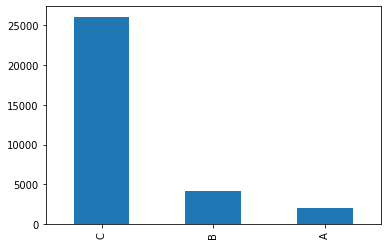

In [ ]:
routes_abc.value_counts().plot(kind='bar')

Категория C составляет 80%

Категория B - 13%

Категория A - 6%

Количество маршрутов в категории С завышено. Принцип Парето выполняется не четко.


##АВС анализ в разбивке по операторам.




In [ ]:
vendor_routes = data.groupby(['VendorID', 'PULocationID', 'DOLocationID'])['total_amount'].sum() / summary
vendor_routes = vendor_routes.sort_values(ascending=False)
vendor_routes = vendor_routes[vendor_routes > 0.0]
vendor_routes_cumsum = vendor_routes.cumsum()
vendor_routes_abc = vendor_routes_cumsum.apply(ABC_segmentation)
vendor_routes_abc.reset_index().groupby('VendorID')['total_amount'].value_counts().unstack()

total_amount,A,B,C
VendorID,,,
1,1745.0,3665.0,15590.0
2,2375.0,4940.0,22631.0
4,NaN,457.0,5216.0


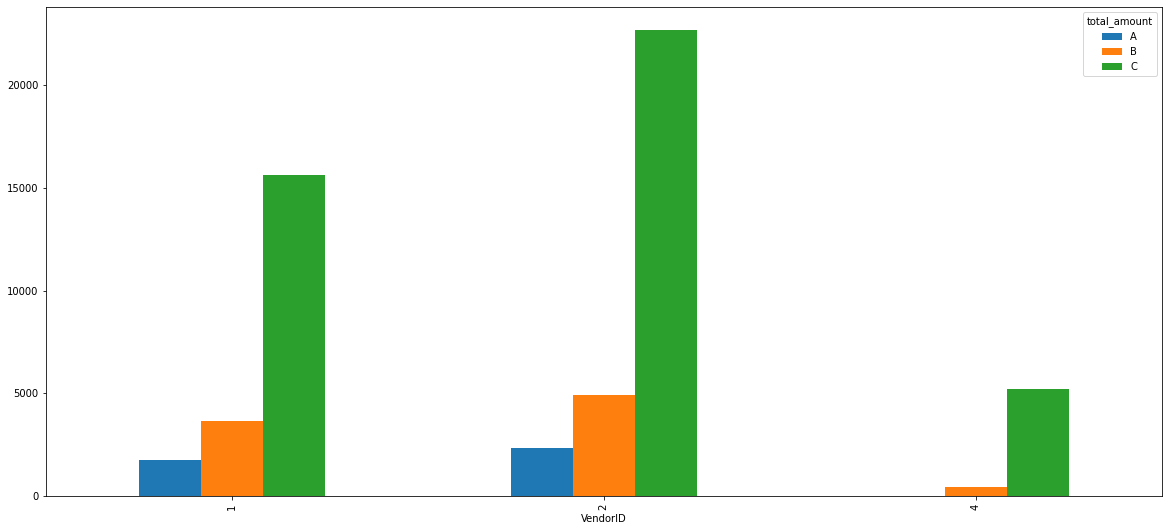

In [ ]:
vendor_routes_abc.reset_index().groupby('VendorID')['total_amount'].value_counts().unstack().plot(kind='bar', figsize=(20,9))

Можно увидеть, что результаты анализа имеют несущественные различия в разбивке по 1 и 2 оператору. 

У 4 оператора отсутствует категория А. Категория В составляет малый процент.

##2. XYZ анализ

Получим из данных номер дня недели и час, в который был совершен заказ, для дальнейшего рассчета волатильности. 

In [ ]:
data['weekday_number'] = data['tpep_pickup_datetime'].dt.weekday
data['hour'] = data['tpep_pickup_datetime'].dt.hour
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,weekday_number,hour
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,False,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,1,0
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,False,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,1,0
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,False,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,4,13
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,False,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,2,15
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,False,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,False,263,4,1,18.0,0.5,0.5,3.86,0.0,0.3,23.16,0.0,3,23
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,False,193,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,3,23
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,False,264,264,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,3,23
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,False,264,7,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,3,23


In [ ]:
routes_num = data[['PULocationID','DOLocationID', 'weekday_number', 'hour', 'VendorID']]
orders = routes_num.groupby(['weekday_number', 'hour', 'PULocationID','DOLocationID']).size()
orders

weekday_number  hour  PULocationID  DOLocationID
0               0     4             4                 7
                                    45                1
                                    48                1
                                    68                1
                                    79                5
                                                   ... 
6               23    264           263               2
                                    264             422
                                    265               5
                      265           236               1
                                    265              14
Length: 797764, dtype: int64

In [ ]:
orders = orders.reset_index().iloc[:,2:].rename({0: 'orders'}, axis=1)
orders

,PULocationID,DOLocationID,orders
0,4,4,7
1,4,45,1
2,4,48,1
3,4,68,1
4,4,79,5
...,...,...,...
797759,264,263,2
797760,264,264,422
797761,264,265,5
797762,265,236,1


Посчитаем стандартное отклонение и среднее за период.

In [ ]:
orders_std = orders.groupby(['PULocationID','DOLocationID']).std().dropna()
orders_std

orders
PULocationID DOLocationID          
1            1             2.684620
             132           0.000000
             264           0.000000
             265           0.000000
2            2             0.000000
...                             ...
265          259           0.000000
             262           0.000000
             263           0.000000
             264           0.394771
             265           8.950096

[24452 rows x 1 columns]

In [ ]:
orders_mean = orders.groupby(['PULocationID','DOLocationID']).mean().dropna()
orders_mean

orders
PULocationID DOLocationID           
1            1              3.435484
             132            1.000000
             137            1.000000
             142            1.000000
             164            1.000000
...                              ...
265          259            1.000000
             262            1.000000
             263            1.000000
             264            1.181818
             265           18.059524

[32242 rows x 1 columns]

Высчитаем волатильность.

In [ ]:
volatility = (orders_std / orders_mean).dropna()
volatility

orders
PULocationID DOLocationID          
1            1             0.781439
             132           0.000000
             264           0.000000
             265           0.000000
2            2             0.000000
...                             ...
265          259           0.000000
             262           0.000000
             263           0.000000
             264           0.334037
             265           0.495589

[24452 rows x 1 columns]

Построим гистограмму для определения границ групп.

(array([1.1199e+04, 4.1730e+03, 4.0980e+03, 3.7700e+03, 9.4900e+02,
        1.9900e+02, 4.1000e+01, 1.0000e+01, 9.0000e+00, 4.0000e+00]),
 array([0.        , 0.19509142, 0.39018284, 0.58527426, 0.78036567,
        0.97545709, 1.17054851, 1.36563993, 1.56073135, 1.75582277,
        1.95091418]),
 <a list of 10 Patch objects>)

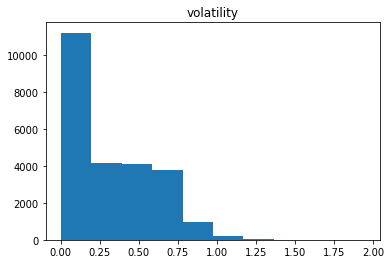

In [ ]:
plt.figure()
plt.title('volatility')
plt.hist(volatility['orders'])

Распределим группы следующим образом:
* X -> < 0.1
* Y -> >= 0.1 and < 0.8
* Z -> >= 0.8

In [ ]:
def XYZ_segmentation(vol):
  if vol < 0.1:
    return 'X'
  if vol >= 0.1 and vol < 0.8:
    return 'Y'
  if vol >= 0.8:
    return 'Z'

volatility['orders'].apply(XYZ_segmentation)

PULocationID  DOLocationID
1             1               Y
              132             X
              264             X
              265             X
2             2               X
                             ..
265           259             X
              262             X
              263             X
              264             Y
              265             Y
Name: orders, Length: 24452, dtype: object

Объединяем результат с ABC анализом и строим график.

In [ ]:
routes_abc = pd.DataFrame(routes_abc).rename({'total_amount': 'ABC_seg'}, axis=1)
routes_abc['XYZ_seg'] = volatility['orders'].apply(XYZ_segmentation)
stocks_class = routes_abc.dropna()
stocks_class['class'] = routes_abc['ABC_seg'] + routes_abc['XYZ_seg']
stocks_class

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ABC_seg XYZ_seg class
PULocationID DOLocationID                      
264          264                A       Y    AY
237          90                 A       Y    AY
138          230                A       Y    AY
132          230                A       Y    AY
             265                A       Y    AY
...                           ...     ...   ...
79           184                C       X    CX
98           121                C       X    CX
153          128                C       Y    CY
259          240                C       Y    CY
19           264                C       X    CX

[24451 rows x 3 columns]

In [ ]:
stocks_class['class'].value_counts()

CX    11126
CY     7119
BY     3601
AY     1564
BZ      506
AZ      466
CZ       50
BX       19
Name: class, dtype: int64

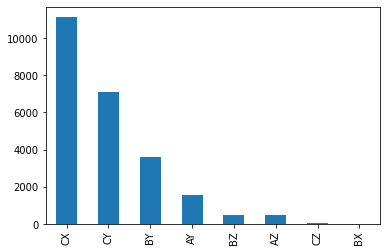

In [ ]:
stocks_class['class'].value_counts().plot(kind='bar')

Исходя из данных видно, что наибольшее количество маршрутов находится в категориях CX и CY, т.е. с низкой потребительской стоимостью и высокой или средней степенью надежности прогноза.

Сделаем все то же самое но в разбивке по операторам такси.

In [ ]:
vendor_orders = routes_num.groupby(['weekday_number', 'hour','VendorID', 'PULocationID','DOLocationID']).size()
vendor_orders = vendor_orders.reset_index().iloc[:,2:].rename({0: 'orders'}, axis=1)

vendor_orders_std = vendor_orders.groupby(['VendorID', 'PULocationID','DOLocationID']).std().dropna()
vendor_orders_mean = vendor_orders.groupby(['VendorID', 'PULocationID','DOLocationID']).mean().dropna()
vendor_volatility = (vendor_orders_std / vendor_orders_mean).dropna()

vendor_routes_abc = pd.DataFrame(vendor_routes_abc).rename({'total_amount': 'ABC_seg'}, axis=1)
vendor_routes_abc['XYZ_seg'] = vendor_volatility['orders'].apply(XYZ_segmentation)
vendor_stocks_class = vendor_routes_abc.dropna()
vendor_stocks_class['class'] = vendor_routes_abc['ABC_seg'] + vendor_routes_abc['XYZ_seg']
vendor_stocks_class = vendor_stocks_class.reset_index().groupby('VendorID')['class'].value_counts().unstack()
vendor_stocks_class

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


class,AY,AZ,BX,BY,BZ,CX,CY,CZ
VendorID,,,,,,,,
1,1458.0,287.0,97.0,3455.0,113.0,6960.0,2629.0,7.0
2,1904.0,471.0,196.0,4557.0,187.0,10461.0,4272.0,27.0
4,NaN,NaN,28.0,425.0,4.0,2248.0,1080.0,1.0


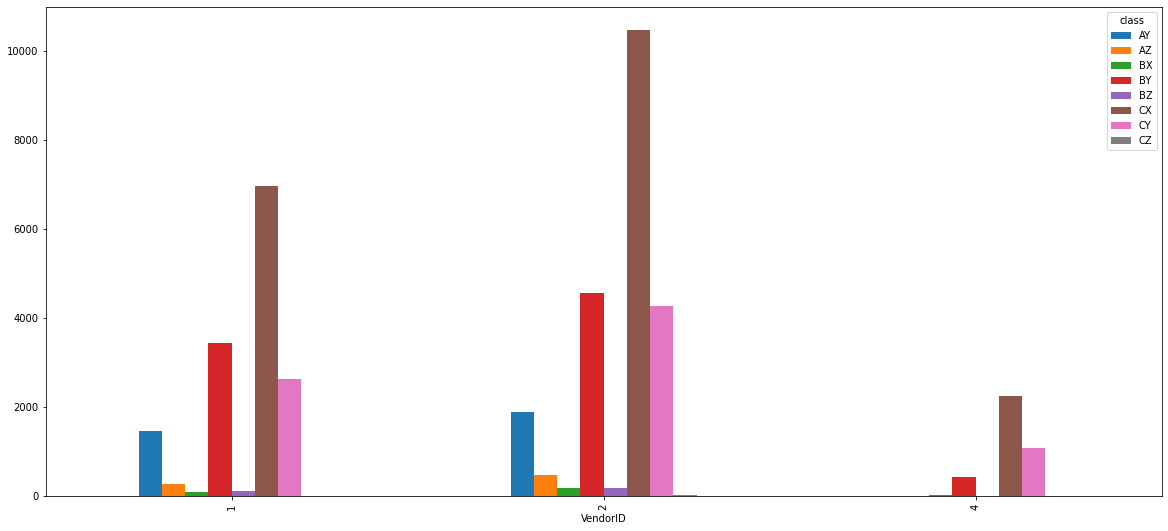

In [ ]:
vendor_stocks_class.plot(kind='bar', figsize=(20,9))

Из данного графика видно, что резултаты анализа в разбиении по операторам несущественно различаются от общих для 1 и 2 оператора. 

У 4 оператора отсутствуют категории AY и AZ.

Для всех операторов характерно преобладание групп CX, BY, CY.

##3. Для нескольких одинаковых зон посадки и высадки (штук 5) сравните средние значения длительности поездки для операторов 1 и 2. Проверьте истинность гипотезы о равенстве среднего времени для выбранных маршрутов с помощью t критерия и pvalue

Выберем самые популярные одинаковые зоны посадки и высадки.

In [ ]:
similar_location = data[data.PULocationID == data.DOLocationID]
similar_location = similar_location[similar_location.PULocationID.isin(similar_location['PULocationID'].value_counts()[:5].index)]
similar_location.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,False,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
86,1,2019-01-01 00:48:53,2019-01-01 00:54:44,1,0.50,1,False,239,239,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15,NaN
103,1,2019-01-01 00:50:41,2019-01-01 01:00:04,2,1.30,1,False,264,264,1,7.5,0.5,0.5,1.58,0.0,0.3,10.38,NaN
145,2,2019-01-01 00:14:19,2019-01-01 00:17:03,2,0.78,1,False,236,236,1,4.5,0.5,0.5,1.16,0.0,0.3,6.96,NaN
197,2,2019-01-01 00:06:30,2019-01-01 00:08:31,1,0.46,1,False,239,239,1,4.0,0.5,0.5,1.59,0.0,0.3,6.89,NaN


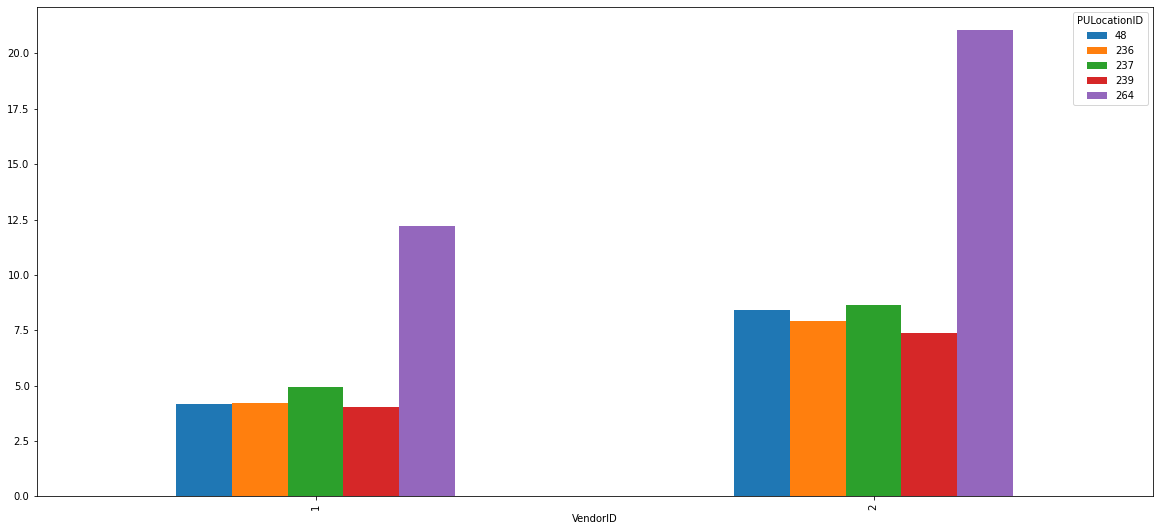

In [ ]:
similar_location['trip_time'] = (similar_location['tpep_dropoff_datetime'] - similar_location['tpep_pickup_datetime']).dt.total_seconds() / 60
similar_location[similar_location.VendorID.isin([1,2])].groupby(['VendorID', 'PULocationID'])['trip_time'].mean().unstack().plot(kind='bar', figsize=(20,9))

На данной диаграмме видно, что в целом среднее время для каждого маршрута больше у 2 оператора. Распределение среднего времени для 1 и 2 операторов по маршрутам во многом совпадает.

In [ ]:
from scipy import stats

Сравним среднее время для каждого маршрута с остальными. Гипотеза о равенстве среднего времени верна, если значение pvalue > 0.05 (True), в обртном случае будет выведено False.



In [ ]:
def pvalue_func(first_path, second_path):
  if stats.ttest_ind(similar_location[similar_location.PULocationID == first_path]['trip_time'], similar_location[similar_location.PULocationID == second_path]['trip_time'])[1] > 0.05:
    return True
  else:
    return False

paths = [48, 236, 237, 239, 264]

print('Проверка истинности гипотез о равенстве среднего времени для маршруторв: ')
for i in range(5):
  for j in range(i+1, 5):
    print(paths[i],' и ', paths[j],': ', pvalue_func(paths[i], paths[j]))



Проверка истинности гипотез о равенстве среднего времени для маршруторв: 
48  и  236 :  True
48  и  237 :  True
48  и  239 :  True
48  и  264 :  False
236  и  237 :  True
236  и  239 :  True
236  и  264 :  False
237  и  239 :  False
237  и  264 :  False
239  и  264 :  False


##4. Загрузка данных в таблицу.

In [43]:
import psycopg2
DB_HOST = '89.223.95.138'
DB_USER = 'student_19'
DB_USER_PASSWORD = 'student_19'
DB_NAME = 'student_19'
conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

In [17]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://%s:%s@%s:5432/%s' %(DB_USER, DB_USER_PASSWORD, DB_HOST, DB_NAME))

data[1100000:1200000].to_sql("yellow_tripdata", engine, 
                 if_exists='append',
                 index=False,
                 method='multi')